# MCMC Model Visual Diagnostics

In this section, we will introduce a suite of diagnostic plots available in Orbit

- Density histogram
- Trace plot
- Pair plot
- Forest plot
- Posterior plot

We leveraged [arviz](https://arviz-devs.github.io/arviz/index.html) for the plotting. ArviZ is a Python package for exploratory analysis of Bayesian models, includes functions for posterior analysis, data storage, model checking, comparison and diagnostics.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import orbit
from orbit.models import LGT, DLT
from orbit.utils.dataset import load_iclaims
from orbit.diagnostics.plot import plot_param_diagnostics, plot_posterior_params

import warnings
warnings.filterwarnings('ignore')

In [4]:
print(orbit.__version__)

1.1.0dev


## Load data

In [5]:
raw_df = load_iclaims()
raw_df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [6]:
raw_df.head(5)

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [7]:
df=raw_df.copy()
test_size=52
train_df=df[:-test_size]
test_df=df[-test_size:]

## Fit a Model

In [8]:
DATE_COL="week"
RESPONSE_COL="claims"
REGRESSOR_COL=['trend.unemploy', 'trend.filling', 'trend.job']

In [9]:
dlt = DLT(
    response_col=RESPONSE_COL,
    date_col=DATE_COL,
    regressor_col=REGRESSOR_COL,
    regressor_sign=["+", '+', '='], 
    seasonality=52,
    num_warmup=2000,
    num_sample=2000,
    chains=4,
    estimator='stan-mcmc',
)

In [10]:
dlt.fit(df=train_df)


Gradient evaluation took 0.000826 seconds
1000 transitions using 10 leapfrog steps per transition would take 8.26 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.001021 seconds
1000 transitions using 10 leapfrog steps per transition would take 10.21 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 0.000888 seconds
Gradient evaluation took 0.000849 seconds
1000 transitions using 10 leapfrog steps per transition would take 8.88 seconds.
Adjust your expectations accordingly!

1000 transitions using 10 leapfrog steps per transition would take 8.49 seconds.

Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 7.18365 seconds (Warm-up)
               3.52008 seconds (Sampling)
               10.7037 seconds (Total)



## Posterior Diagnostic Viz

### trace plot

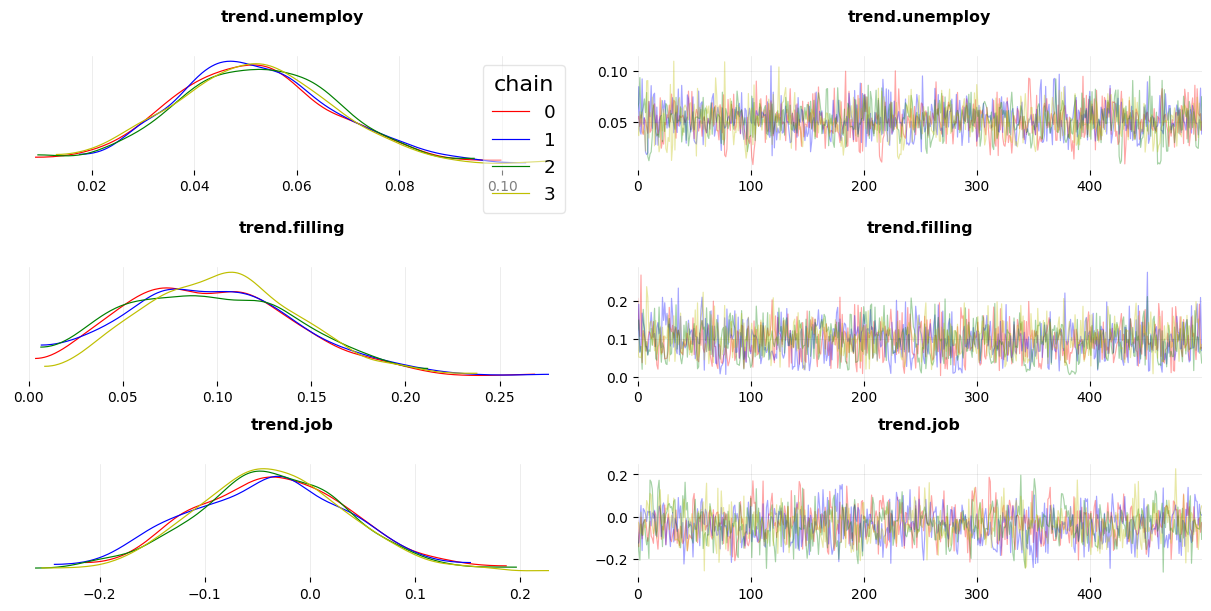

In [11]:
plot_param_diagnostics(dlt, which='trace', kind="trace", 
                       legend=True,
                       chain_prop={"color": ["r", "b","g","y"]});

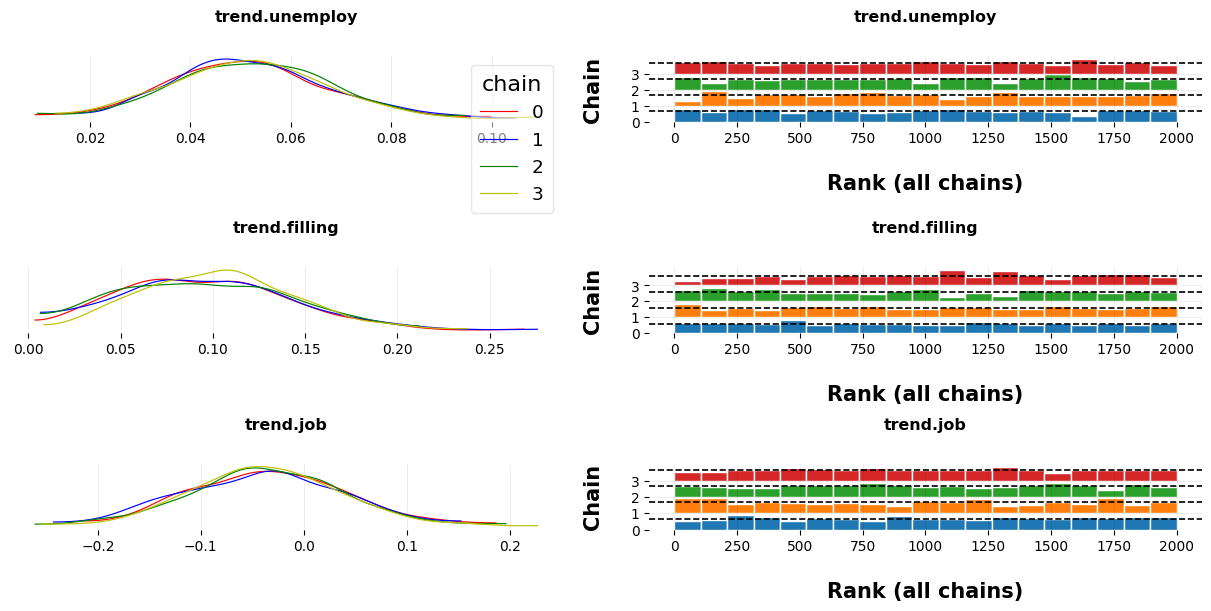

In [12]:
plot_param_diagnostics(dlt, which='trace', kind="rank_bars",
                       legend=True,
                       chain_prop={"color": ["r", "b","g","y"]});

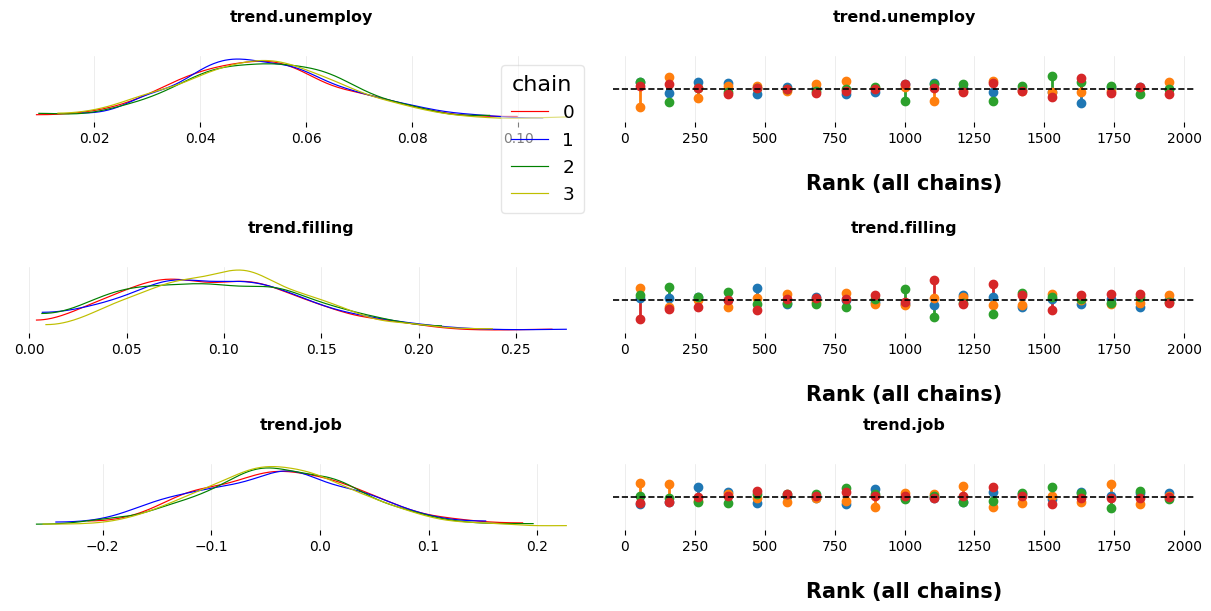

In [13]:
plot_param_diagnostics(dlt, which='trace', kind="rank_vlines",
                       legend=True,
                       chain_prop={"color": ["r", "b","g","y"]});

### density plot

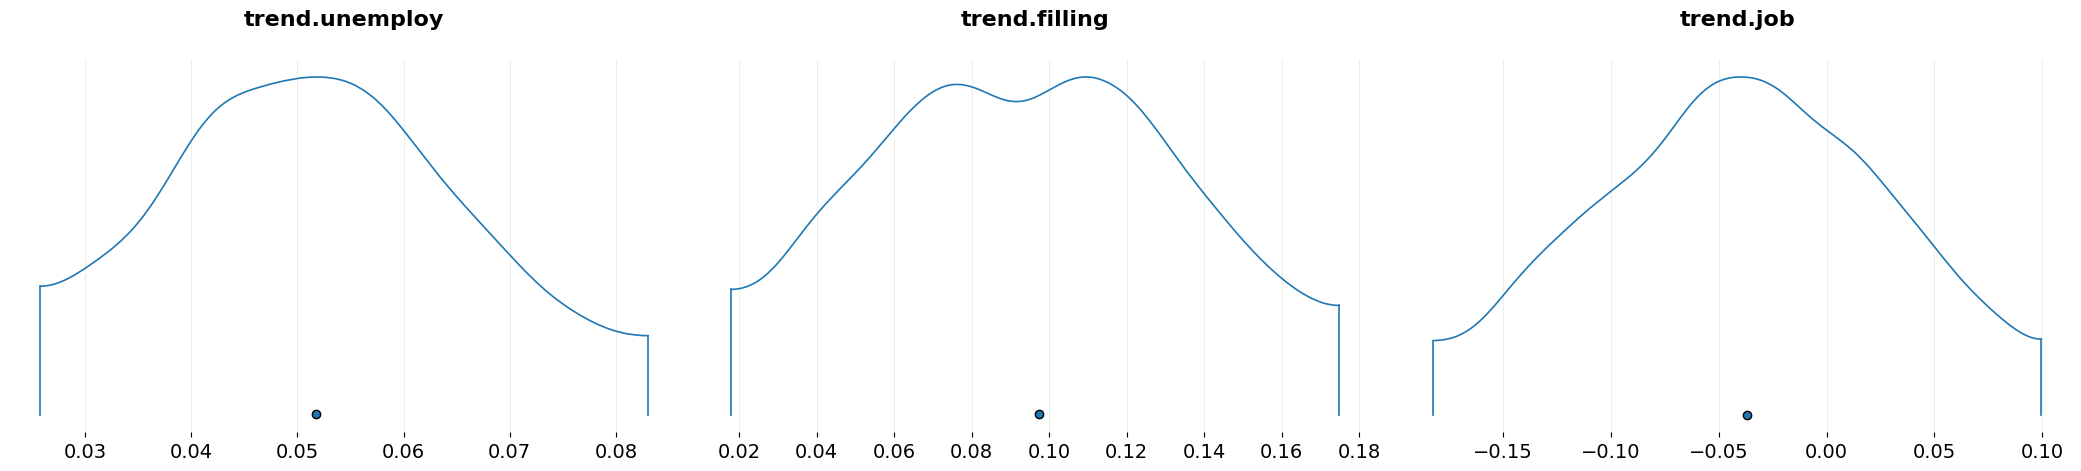

In [14]:
plot_param_diagnostics(dlt, which='density');

Meanwhile, we have our own customized plotting utility for density plot with more info added in the graph.

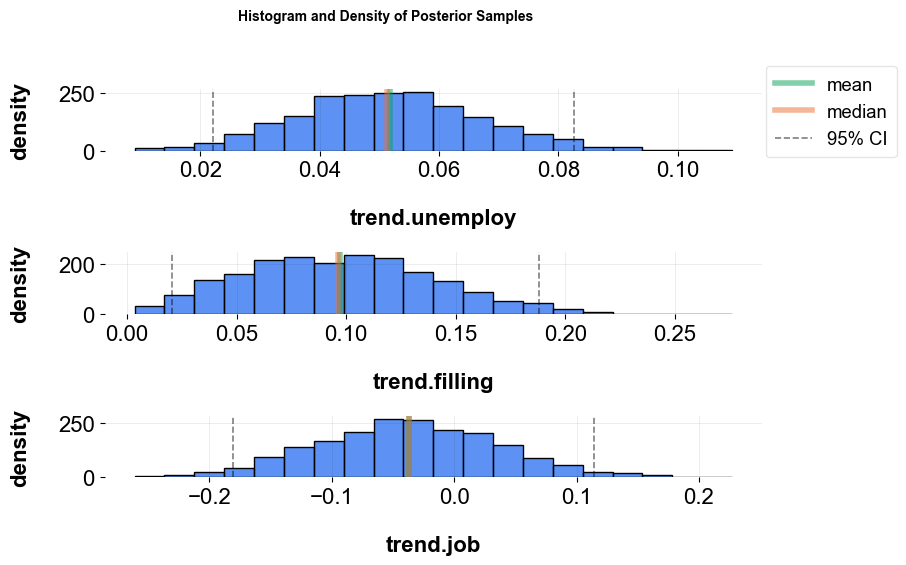

In [15]:
plot_posterior_params(dlt, kind='density');

### pair plot

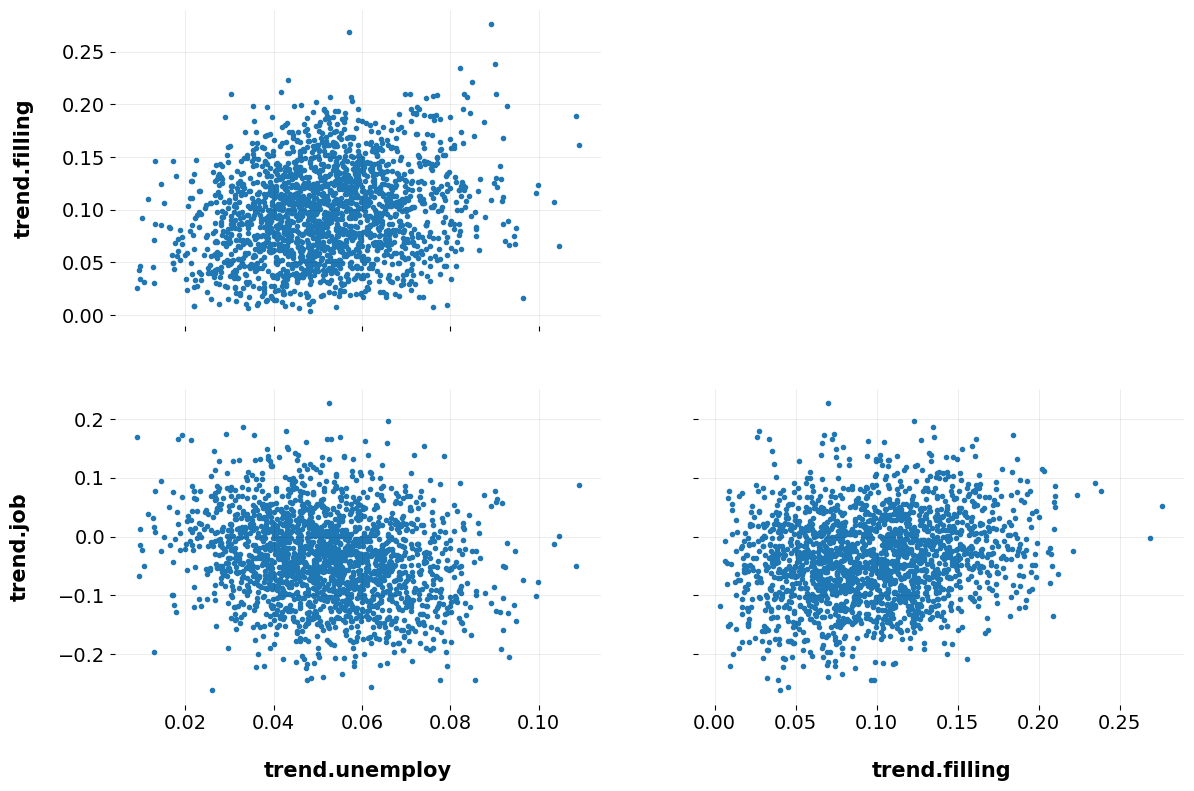

In [16]:
plot_param_diagnostics(dlt, which='pair');

### forest plot

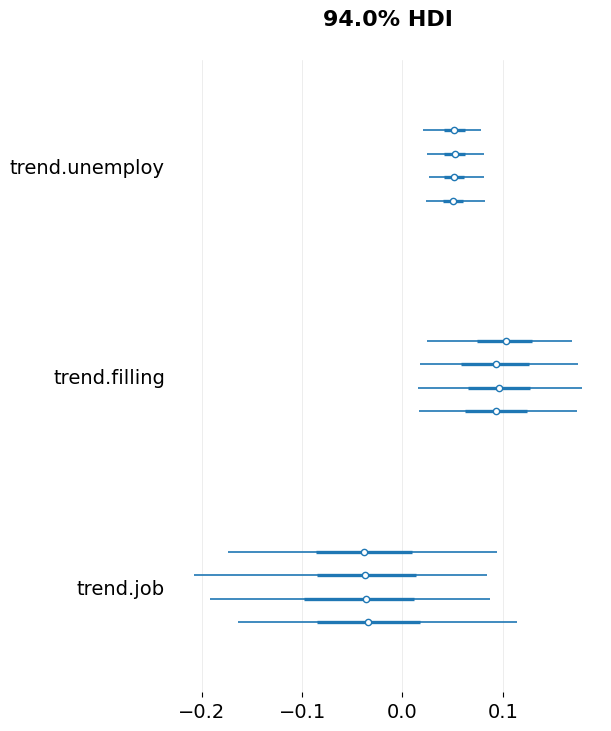

In [17]:
plot_param_diagnostics(dlt, which='forest');

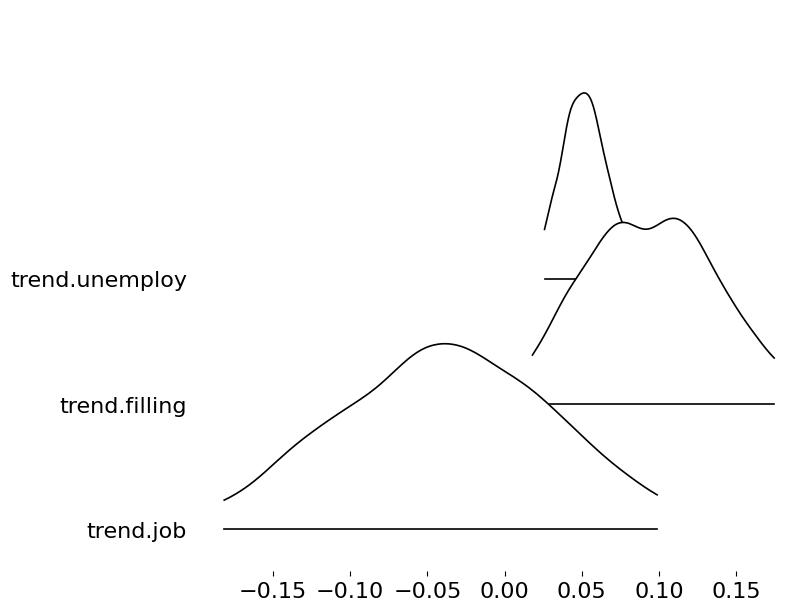

In [18]:
plot_param_diagnostics(dlt, which='forest', kind='ridgeplot', 
                       colors='white', combined=True, figsize=(8, 6));

### posterior plot

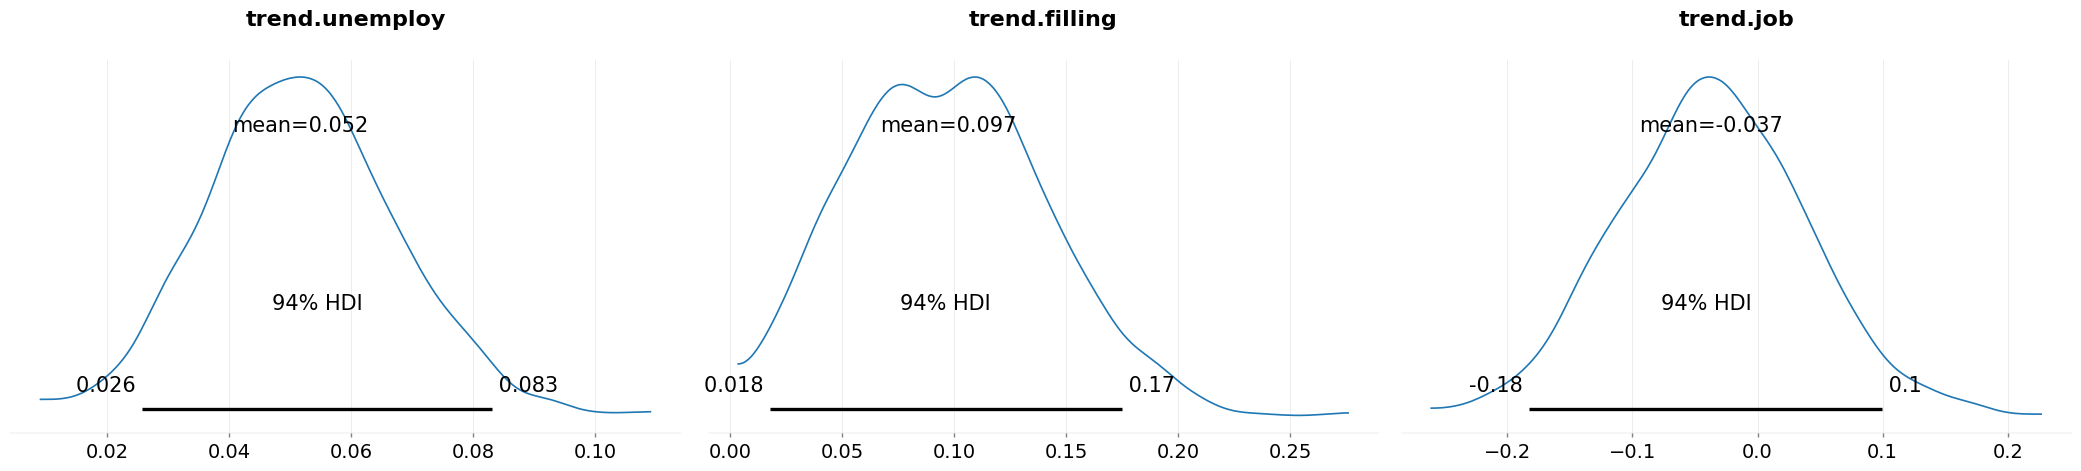

In [19]:
plot_param_diagnostics(dlt, which='posterior');